In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

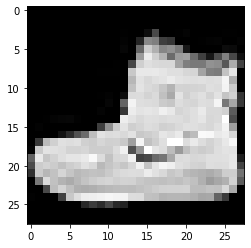

In [9]:
plt.imshow(train_images[0], cmap='gray')

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
train_images, test_images = train_images / 255., test_images / 255.

In [20]:
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 164us/sample - loss: 0.2812 - accuracy: 0.8959 - val_loss: 0.3607 - val_accuracy: 0.8715
Epoch 2/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2683 - accuracy: 0.9012 - val_loss: 0.3292 - val_accuracy: 0.8836
Epoch 3/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2570 - accuracy: 0.9051 - val_loss: 0.3422 - val_accuracy: 0.8758
Epoch 4/5
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2483 - accuracy: 0.9074 - val_loss: 0.3479 - val_accuracy: 0.8795
Epoch 5/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2383 - accuracy: 0.9109 - val_loss: 0.3423 - val_accuracy: 0.8791


In [21]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 99us/sample - loss: 0.3423 - accuracy: 0.8791


In [23]:
classifications = model.predict(test_images)

In [26]:
print(np.argmax(classifications[0]))
print(test_labels[0])

9
9


In [44]:
model = keras.Sequential()

In [45]:
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                             padding='same', activation='relu',
                             input_shape=(28,28,1)))

In [46]:
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

In [47]:
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                             padding='same', activation='relu'))

In [48]:
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

In [49]:
model.add(keras.layers.Flatten())

In [50]:
model.add(keras.layers.Dense(64, activation='relu'))

In [51]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
train_images.shape

(60000, 28, 28)

In [37]:
X_train = train_images.reshape(len(train_images), 28, 28, 1)

In [39]:
X_train.shape

(60000, 28, 28, 1)

In [40]:
y_train = train_labels

In [41]:
X_test = test_images.reshape(len(test_images), 28, 28, 1)

In [42]:
y_test = test_labels

In [56]:
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 48s 795us/sample - loss: 0.2815 - accuracy: 0.8994
Epoch 2/5
60000/60000 [==============================] - 47s 778us/sample - loss: 0.2356 - accuracy: 0.9129- loss: 0.2355 - accuracy: 
Epoch 3/5
60000/60000 [==============================] - 46s 771us/sample - loss: 0.2026 - accuracy: 0.9269
Epoch 4/5
60000/60000 [==============================] - 47s 776us/sample - loss: 0.1783 - accuracy: 0.9342
Epoch 5/5
60000/60000 [==============================] - 52s 868us/sample - loss: 0.1569 - accuracy: 0.9421


In [57]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 322us/sample - loss: 0.2465 - accuracy: 0.9130


[0.24646088696718216, 0.913]

In [58]:
classifications = model.predict(X_test)

In [67]:
for i in range(10):
    print(np.argmax(classifications[i+10]) == y_test[i+10])

True
True
True
True
False
True
True
False
True
True
